In [32]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25' 
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [33]:
# Replace this variable accordingly 
path_to_results = "../experiments/2018-02-17-23-37_PowerN_/"

In [34]:
data = pandas.read_csv(path_to_results + "PowerN.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [35]:
data['n'].unique()

array([ 100,  200,  500, 1000, 2000])

In [36]:
data["testId"].unique()

array(['KS', 'MWP', 'MWPr', 'UDS', 'CMI', 'HiCS', 'II', 'TC', 'MS', 'MAC'], dtype=object)

In [37]:
data["nDim"].unique()

array([2, 3, 5])

In [38]:
data["M"].unique()

array([ nan])

In [39]:
data["n"].unique()

array([ 100,  200,  500, 1000, 2000])

In [40]:
data["refId"].unique()

array(['0-Hypothesis', 'Independent-2-0.0', 'LinearThenDummy-2-0.0', ...,
       'Sine_5-5-1.0', 'LinearThenNoise-5-1.0', 'Linear-5-1.0'], dtype=object)

In [41]:
selectedCategories = ['i', 'zi', 'ho', 'st', 'si_1.0', 'cr', 'hcg', 'hc',
       'l', 'hs', 'dl_0.25', 'si_5.0', 'p_1.0']
selectedCategories = ['Linear', 'Independent', 'Sine_5', 'Sine_1', 'HyperSphere', "Hollowcube", "Sphere",
       'Hypercube', 'Hourglass', 'HypercubeGraph', 'Zinv', 'Parabolic_1', "EvenPower_1",
       'Cross', 'Star', 'DoubleLinear_0.25']

In [42]:
selectedTests = data['testId'].unique()

In [43]:
data["category"].unique()

array(['0', 'Independent', 'LinearThenDummy', 'Linear', 'Sine_5',
       'Hollowcube', 'Hypercube', 'Z', 'Star', 'Sine_1', 'Zinv', 'Sphere',
       'LinearThenNoise', 'Hourglass', 'EvenPower_1', 'DoubleLinear_0.25',
       'OddPower_1', 'RandomSteps_10', 'Cross', 'NonCoexistence'], dtype=object)

In [44]:
selectedCategoriesDict = {
    'Linear': "L", 
    'Independent' : "I", 
    'Sine_5' : "S5", 
    'Sine_1' : "S1", 
    'HyperSphere' : "Hs",
    'Hypercube' : "Hc", 
    'Hourglass': "H", 
    'HypercubeGraph' : "HcG", 
    'Hollowcube' : "HcG", 
    'Zinv' : "Zi", 
    'Parabolic_1' : "P",
    'Cross':"C", 
    'Star': "St", 
    'DoubleLinear_0.25': "Dl",
    "Sphere" : "Hs",
    "EvenPower_1": "P"
    #'l' : "L",
    #'si_1.0' : "S1", 
    #'si_5.0' : "S5", 
    #'hc' : "Hc", 
    #'dl_0.25': "Dl", 
    #"cr": "C",
    #'ho' : "H", 
    #'hs' : "Hs",
    #'p_1.0' : "P", 
    #'st' : "St",
    #'zi' : "Zi", 
    #"i" : "I",
    #'hcg' : "HcG", 
}

In [45]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData = selectedData[[str(x) in selectedTests for x in selectedData["testId"]]]
selectedData["category"] = [selectedCategoriesDict[x] for x in selectedData["category"]]

In [46]:
data["category"].unique()

array(['0', 'Independent', 'LinearThenDummy', 'Linear', 'Sine_5',
       'Hollowcube', 'Hypercube', 'Z', 'Star', 'Sine_1', 'Zinv', 'Sphere',
       'LinearThenNoise', 'Hourglass', 'EvenPower_1', 'DoubleLinear_0.25',
       'OddPower_1', 'RandomSteps_10', 'Cross', 'NonCoexistence'], dtype=object)

In [47]:
selectedData["category"].unique()

array(['I', 'L', 'S5', 'HcG', 'Hc', 'St', 'S1', 'Zi', 'Hs', 'H', 'P', 'Dl',
       'C'], dtype=object)

In [48]:
data["category"].unique()

array(['0', 'Independent', 'LinearThenDummy', 'Linear', 'Sine_5',
       'Hollowcube', 'Hypercube', 'Z', 'Star', 'Sine_1', 'Zinv', 'Sphere',
       'LinearThenNoise', 'Hourglass', 'EvenPower_1', 'DoubleLinear_0.25',
       'OddPower_1', 'RandomSteps_10', 'Cross', 'NonCoexistence'], dtype=object)

In [49]:
selectedData["category"].unique()

array(['I', 'L', 'S5', 'HcG', 'Hc', 'St', 'S1', 'Zi', 'Hs', 'H', 'P', 'Dl',
       'C'], dtype=object)

## Fig 8: Average score w.r.t. n, \sigma = 1/30

In [30]:
selectedData['n'].unique()

array([ 100,  200,  500, 1000, 2000])

<IPython.core.display.Javascript object>


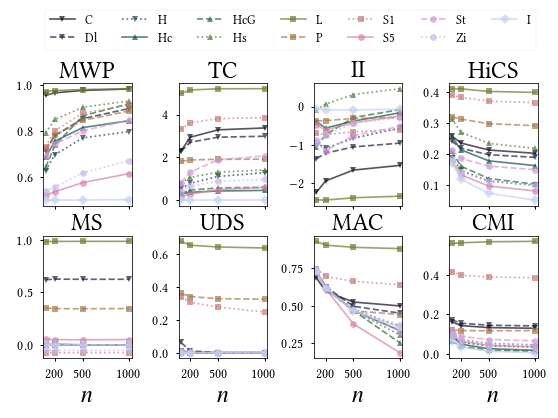

Index(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi',
       'I'],
      dtype='object', name='category')


In [51]:
from cycler import cycler


monochrome=((cycler('marker', ['v', '^', 's', 'o', "D"]) * (cycler('linestyle', ['-', '--', ':']))) + 
            cycler('color', sns.color_palette("cubehelix", 15)) )

noise = 1/30
maxn = 1000

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8,6), sharex=True)
axess = axes.reshape(-1)
for ax in axess:
    ax.set_prop_cycle(monochrome)

testlist = ["MWP", "TC", "II", "HiCS", "MS", "UDS", "MAC", "CMI"]
for i,test in enumerate(testlist):
    d = selectedData[(selectedData["testId"]==test) & (selectedData["category"])& 
                     (selectedData["noise"]==noise) &
                     (selectedData["n"]<=maxn) &
                     (selectedData["nDim"]==3)].groupby(["n", "category"])
    means = d.mean()
    means = means.reindex(
        #['C', "P", "Dl", "S1", "H", 'S5', 'Hc', 'St', 'HcG', "Zi", "Hs", "I", 'L']
        ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"], level="category")
    #errors = d.std()
    #ax = means.unstack().plot(y="avgContrast", ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    #ax = means.unstack()["avgContrast"].plot(ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    for x in ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"]:
        means.unstack()["avgContrast"][x].plot(ax=axess[i], alpha=0.7)
    ax = axess[i]
    ax.set_ylabel("")
    ax.set_xticks([200,  500, 1000])
    ax.set_xlim((75,1025))
    if(i > 3):
        ax.set_xlabel("$n$")
    else:
        ax.set_xlabel("")
        

    ax.set_title(r'%s'%test)
    if(i==0):
        print(means.unstack()["avgContrast"].columns)
        L=ax.legend(loc='upper center', bbox_to_anchor=(2.80, 1.65), ncol=7, fontsize=13)
        L.set_title("")
    else:
        L = ax.legend()
        L.remove()
        
plt.tight_layout()
fig.subplots_adjust(top=0.80)
#plt.savefig("plots/Fig8.pdf")

<IPython.core.display.Javascript object>


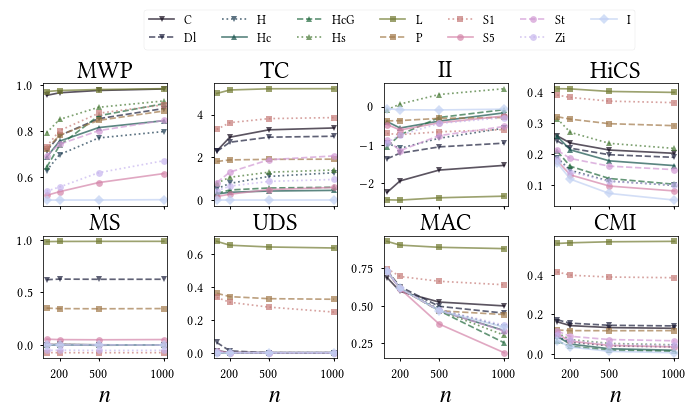

Index(['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi',
       'I'],
      dtype='object', name='category')


In [50]:
from cycler import cycler


monochrome=((cycler('marker', ['v', '^', 's', 'o', "D"]) * (cycler('linestyle', ['-', '--', ':']))) + 
            cycler('color', sns.color_palette("cubehelix", 15)) )

noise = 1/30
maxn = 1000

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,6), sharex=True)
axess = axes.reshape(-1)
for ax in axess:
    ax.set_prop_cycle(monochrome)

testlist = ["MWP", "TC", "II", "HiCS", "MS", "UDS", "MAC", "CMI"]
for i,test in enumerate(testlist):
    d = selectedData[(selectedData["testId"]==test) & (selectedData["category"])& 
                     (selectedData["noise"]==noise) &
                     (selectedData["n"]<=maxn) &
                     (selectedData["nDim"]==3)].groupby(["n", "category"])
    means = d.mean()
    means = means.reindex(
        #['C', "P", "Dl", "S1", "H", 'S5', 'Hc', 'St', 'HcG', "Zi", "Hs", "I", 'L']
        ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"], level="category")
    #errors = d.std()
    #ax = means.unstack().plot(y="avgContrast", ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    #ax = means.unstack()["avgContrast"].plot(ax=axess[i], alpha=0.7)#, yerr="stdContrast")
    for x in ['C', 'Dl', 'H', 'Hc', 'HcG', 'Hs', 'L', 'P', 'S1', 'S5', 'St', 'Zi', "I"]:
        means.unstack()["avgContrast"][x].plot(ax=axess[i], alpha=0.7)
    ax = axess[i]
    ax.set_ylabel("")
    ax.set_xticks([200,  500, 1000])
    ax.set_xlim((75,1025))
    if(i > 3):
        ax.set_xlabel("$n$")
    else:
        ax.set_xlabel("")
        

    ax.set_title(r'%s'%test)
    if(i==0):
        print(means.unstack()["avgContrast"].columns)
        L=ax.legend(loc='upper center', bbox_to_anchor=(2.80, 1.65), ncol=7, fontsize=13)
        L.set_title("")
    else:
        L = ax.legend()
        L.remove()
        
plt.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("plots/Fig8-2.pdf")

In [19]:
means

nDim     noise  nRep  alpha   M  powerAt90  powerAt95  \
n    category                                                          
100  C            3  0.033333   500    NaN NaN      1.000      1.000   
     Dl           3  0.033333   500    NaN NaN      0.996      0.976   
     H            3  0.033333   500    NaN NaN      0.728      0.612   
     Hc           3  0.033333   500    NaN NaN      0.986      0.962   
     L            3  0.033333   500    NaN NaN      1.000      1.000   
     S1           3  0.033333   500    NaN NaN      0.998      0.996   
     S5           3  0.033333   500    NaN NaN      0.168      0.076   
     St           3  0.033333   500    NaN NaN      0.966      0.920   
     Zi           3  0.033333   500    NaN NaN      0.256      0.160   
     I            3  0.033333   500    NaN NaN      0.064      0.024   
200  C            3  0.033333   500    NaN NaN      1.000      1.000   
     Dl           3  0.033333   500    NaN NaN      1.000      1.000   
     H            3  0.033333   500    NaN NaN      0.966      0.926   
     Hc           3  0.033333   500    NaN NaN      1.000      1.000   
     L            3  0.033333   500    NaN NaN      1.000      1.000   
     S1           3  0.033333   500    NaN NaN      1.000      1.000   
     S5           3  0.033333   500    NaN NaN      0.294      0.144   
     St           3  0.033333   500    NaN NaN      0.998      0.992   
     Zi           3  0.033333   500    NaN NaN      0.432      0.250   
     I            3  0.033333   500    NaN NaN      0.114      0.050   
500  C            3  0.033333   500    NaN NaN      1.000      1.000   
     Dl           3  0.033333   500    NaN NaN      1.000      1.000   
     H            3  0.033333   500    NaN NaN      1.000      1.000   
     Hc           3  0.033333   500    NaN NaN      1.000      1.000   
     L            3  0.033333   500    NaN NaN      1.000      1.000   
     S1           3  0.033333   500    NaN NaN      1.000      1.000   
     S5           3  0.033333   500    NaN NaN      0.520      0.410   
     St           3  0.033333   500    NaN NaN      1.000      1.000   
     Zi           3  0.033333   500    NaN NaN      0.800      0.692   
     I            3  0.033333   500    NaN NaN      0.100      0.064   
1000 C            3  0.033333   500    NaN NaN      1.000      1.000   
     Dl           3  0.033333   500    NaN NaN      1.000      1.000   
     H            3  0.033333   500    NaN NaN      1.000      1.000   
     Hc           3  0.033333   500    NaN NaN      1.000      1.000   
     L            3  0.033333   500    NaN NaN      1.000      1.000   
     S1           3  0.033333   500    NaN NaN      1.000      1.000   
     S5           3  0.033333   500    NaN NaN      0.780      0.604   
     St           3  0.033333   500    NaN NaN      1.000      1.000   
     Zi           3  0.033333   500    NaN NaN      0.974      0.910   
     I            3  0.033333   500    NaN NaN      0.108      0.038   

               powerAt99  thresholdAt90  thresholdAt95  ...  avgContrast  \
n    category                                           ...                
100  C             1.000       0.578538       0.602560  ...     0.954702   
     Dl            0.906       0.578538       0.602560  ...     0.714650   
     H             0.432       0.578538       0.602560  ...     0.629170   
     Hc            0.800       0.578538       0.602560  ...     0.687331   
     L             1.000       0.578538       0.602560  ...     0.971435   
     S1            0.964       0.578538       0.602560  ...     0.733611   
     S5            0.026       0.578538       0.602560  ...     0.522214   
     St            0.788       0.578538       0.602560  ...     0.694378   
     Zi            0.064       0.578538       0.602560  ...     0.540381   
     I             0.004       0.578538       0.602560  ...     0.501909   
200  C             1.000       0.567731       0.598212  ...     0.965960   
  

In [ ]:
# note that here, UDS showed a particularly weird behavior w.r.t. L